In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import warnings
warnings.filterwarnings('ignore')

In [5]:
preseason_df = pd.read_csv('데이터셋/KBO/Pre_Season_Batter.csv')
regular_season_df = pd.read_csv('데이터셋/KBO/Regular_Season_Batter.csv')

In [6]:
print("preseason_df.shape: ", preseason_df.shape)
print("regular_season_df.shape: ", regular_season_df.shape)

preseason_df.shape:  (1393, 29)
regular_season_df.shape:  (2454, 29)


In [11]:
preseason_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [12]:
preseason_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


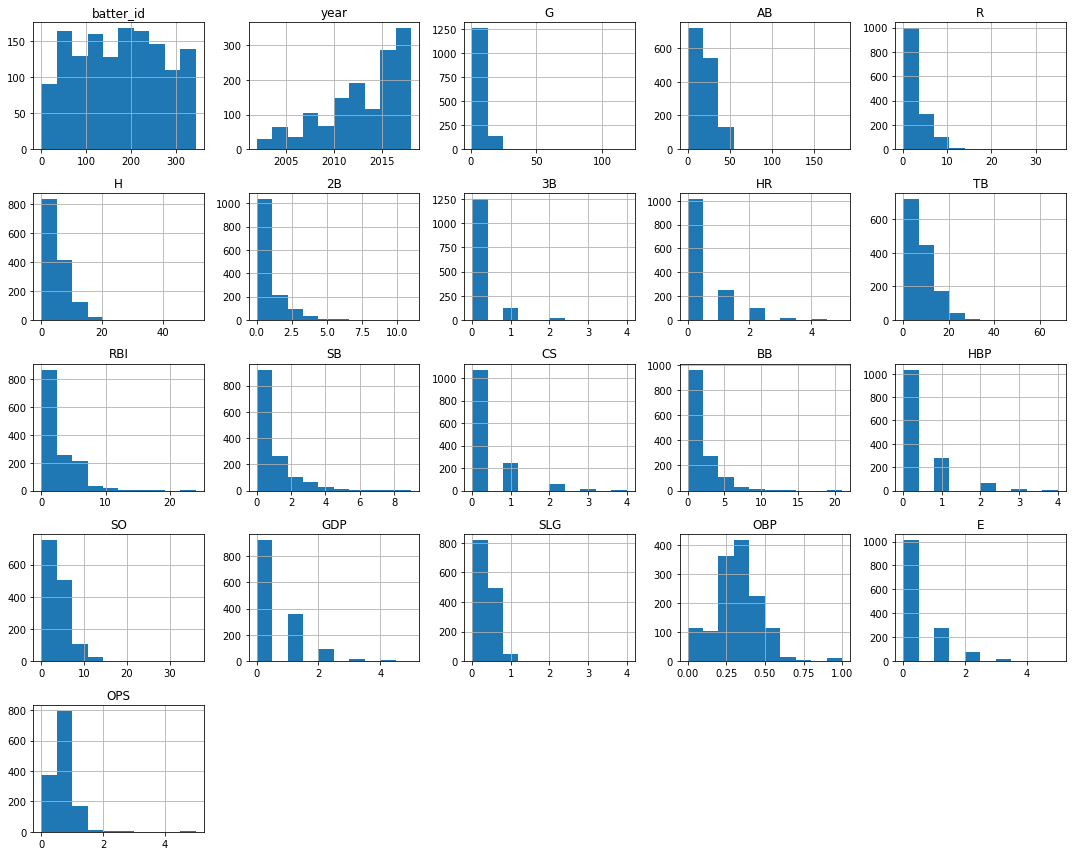

In [16]:
preseason_df.hist(figsize=(15,12))
plt.tight_layout()

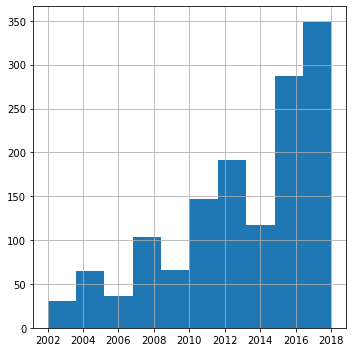

In [22]:
preseason_df['year'].hist(figsize=(5,5))
plt.tight_layout()
plt.show()

In [26]:
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [33]:
pd.concat([regular_count,preseason_count], axis = 1).transpose().loc[:,2000:]                               #transpose --> 세로자료인걸 가로자료로 나타내줌 

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,20.0,32.0,43.0,54.0,68.0,73.0,85.0,98.0,115.0,124.0,130.0,151.0,174.0,194.0,186.0,207.0,213.0,217.0,227.0
preseason,NaN,NaN,12.0,19.0,28.0,37.0,36.0,43.0,61.0,66.0,72.0,75.0,87.0,104.0,117.0,134.0,153.0,167.0,182.0


In [36]:
abalone = pd.read_csv('데이터셋/abalone.csv')

In [39]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
correlation = abalone['Rings'].corr(abalone['Height'])
print('{} and {} - corr : {}'.format('Rings','Height',round(correlation,3)))

Rings and Height - corr : 0.557


In [46]:
import seaborn as sns

<AxesSubplot:>

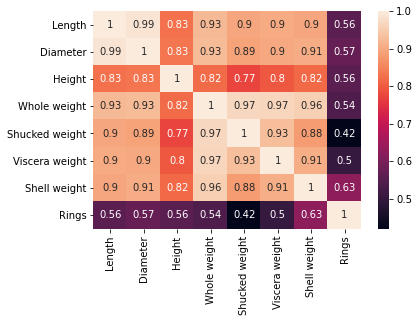

In [47]:
sns.heatmap(abalone.corr(), annot = True)

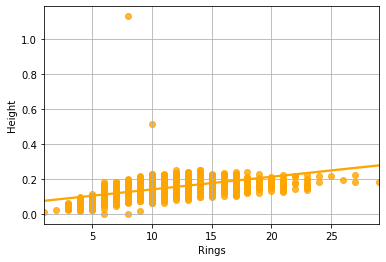

In [53]:
sns.regplot(x = abalone['Rings'],
            y = abalone['Height'],
            color = 'orange')
plt.grid()

In [54]:
def corr_abalone(var_name1, var_name2):
    corr = abalone[var_name1].corr(abalone[var_name2])
    print('{} and {} - corr : {}'.format(var_name1,var_name2,round(corr,3)))
    return corr

In [55]:
for  i in range(1, len(abalone.columns)-1):
    corr_data = corr_abalone(abalone.columns[8], abalone.columns[i])
    

Rings and Length - corr : 0.557
Rings and Diameter - corr : 0.575
Rings and Height - corr : 0.557
Rings and Whole weight - corr : 0.54
Rings and Shucked weight - corr : 0.421
Rings and Viscera weight - corr : 0.504
Rings and Shell weight - corr : 0.628


Rings and Shell weight - corr : 0.628


Text(0.5, 1.0, 'Rings and Shell weight - corr : 0.557')

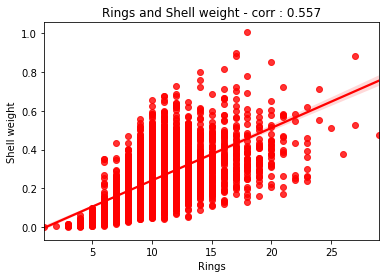

In [63]:
corr_val = corr_abalone(abalone.columns[8],abalone.columns[7])

sns.regplot(x=abalone['Rings'], y = abalone['Shell weight'], color = 'red')
plt.title('{} and {} - corr : {}'.format('Rings','Shell weight',round(correlation,3)))